# Activation function and Classification

In [1]:
import matplotlib.pyplot as plt
import dataset
import numpy as np

# Generate the dataset
SAMPLE_SIZE = 100
xs,ys = dataset.get_beans(SAMPLE_SIZE)

## Sigmoid function
We use sigmoid function as our activiation function

$S(x) = \frac{1}{1 + e^{-x}}$

to make our prediction function continuous and differentiatable so that it can do classification

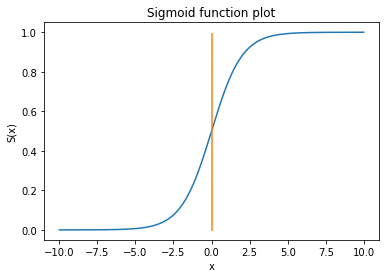

In [2]:
x_test = np.arange(-10, 10, 0.01)
s_x = 1/(1+np.exp(-x_test))

x_ref = np.zeros(100)
y_ref = np.arange(0, 1, 0.01)

# Configure the plot
plt.title("Sigmoid function plot", fontsize=12)
plt.xlabel('x')
plt.ylabel('S(x)')

# Plot the curve
plt.plot(x_test, s_x)
plt.plot(x_ref, y_ref)
plt.show()

## Substitute Sigmoid function into cost function
$e = (y - y_{pre})^2$

$y_{pre} = sigmoid(wx + b)$

$e = (y - sigmoid(wx + b))^2$

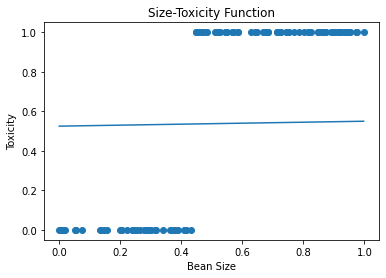

In [3]:
# Configure the plot
plt.title("Size-Toxicity Function", fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')

# Plot the generated random data
plt.scatter(xs, ys)

# Define prediction function arbitrarily
w = 0.1
b = 0.1
z = w*xs+b              # Prediction function
a = 1/(1+np.exp(-z))    # Sub prediction function into Sigmoid function

plt.plot(xs, a)
plt.show()

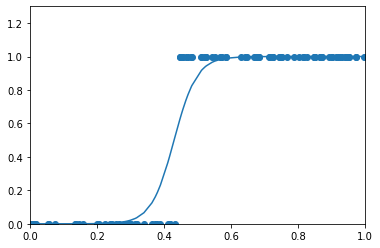

In [4]:
# Plot a dynamic plot
from IPython import display

alpha = 0.05   # step factor
for m in range(5000):
    for i in range(SAMPLE_SIZE):
        x = xs[i]
        y = ys[i]
        
        # Forward propagation
        # Write down the z, a, and e functions
        z = w*x + b
        a = 1 / (1 + np.exp(-z))

        # Get cost function 
        e = (y - a)**2

        # Get partial differential result for e'(a), a'(z), and z'(w)
        deda = -2 * (y - a)
        dadz = a * (1 - a)                     # Derived from the Sigmoid differential equation 
        dzdw = x
        dzdb = 1

        # Backward propagation
        # Get dedw and dedb to update the cost function e(w, b)
        dedw = deda * dadz * dzdw
        dedb = deda * dadz * dzdb

        # Gradient descent
        w = w - alpha * dedw                   # update w 值 according to current gradient
        b = b - alpha * dedb                   # update b 值 according to current gradient

        # 前向传播, 更新 z 和 a
        z = w * xs + b
        a = 1 / (1 + np.exp(-z))
        
    # Plot the curve every 100 step
    if m % 100 == 0:
        # plot a dynamic fitting curve
        plt.clf()
        plt.scatter(xs,ys)

        plt.xlim(0, 1)
        plt.ylim(0, 1.3)
        plt.plot(xs, a)                        # Plot the sigmoid function vs x value 
        display.clear_output(wait=True)
        plt.pause(0.01)